In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Snippet for the use of relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Unsupervised Learning (part. 2)

## Clustering

We will use 2 clustering methods : K-Means and EM with a gaussian mixture

In [16]:
from src.data.make_dataset import X, Y, get_split_data
from src.visualization.visualize import plotClusters, getClustersStats

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [7]:
X_train, X_test, y_train, y_test = get_split_data(test_size=0.2)

In [84]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_train)

In [85]:
predict = kmeans.predict(X_test)

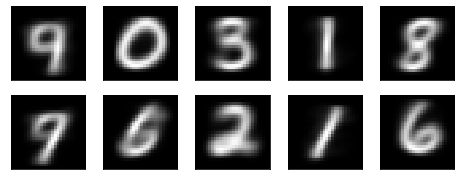

In [93]:
from src.visualization.visualize import plotClustersDigits

plotClustersDigits(kmeans.cluster_centers_)

We can then plot the confusion matrix to understand where our clustering is failing

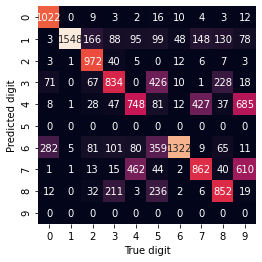

In [94]:
from src.visualization.visualize import plotConfusionMatrix

plotConfusionMatrix(predict, y_test)

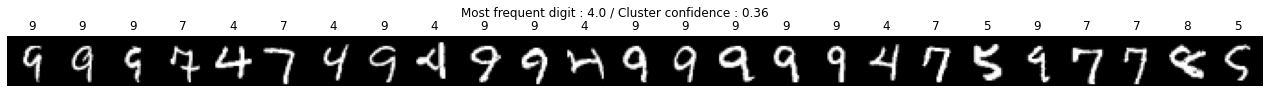

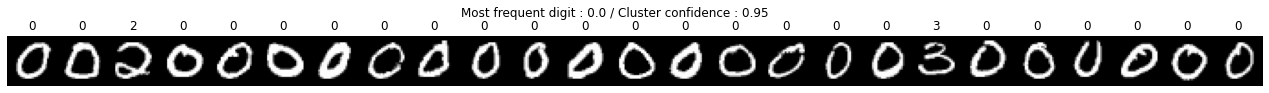

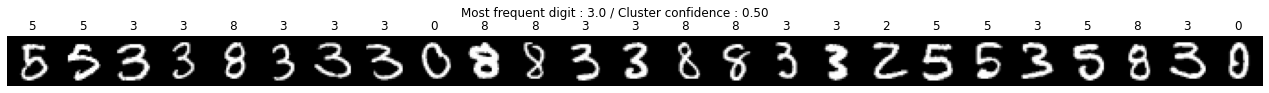

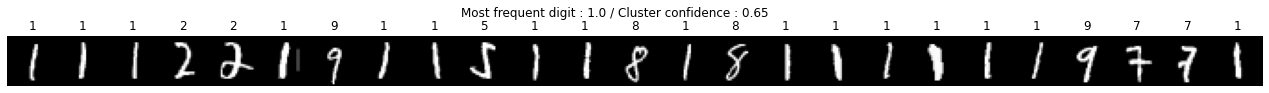

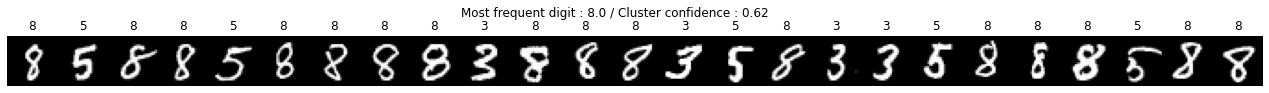

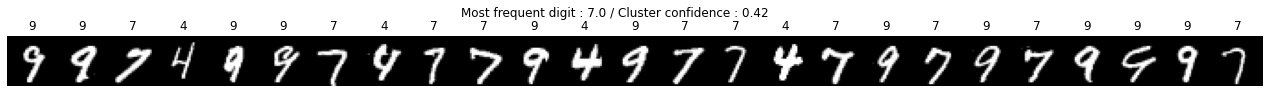

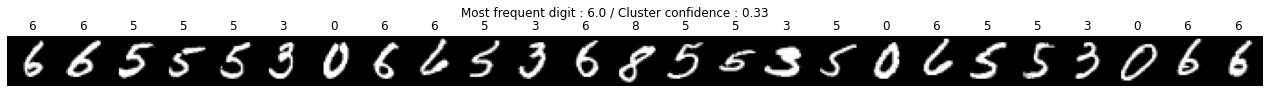

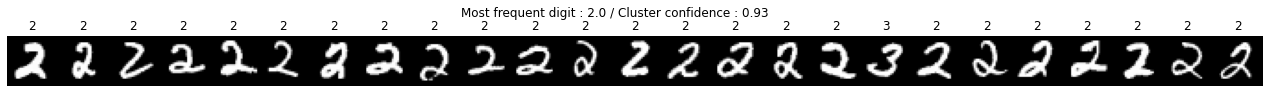

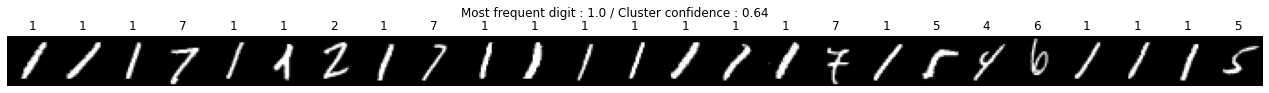

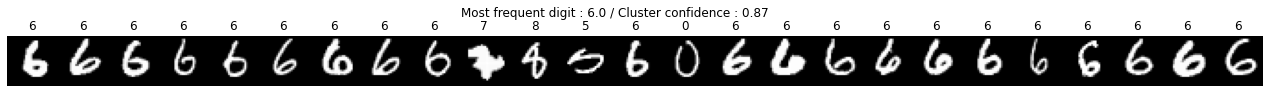

In [26]:
stats = getClustersStats(predict, y_test)
plotClusters(X_test, predict, y_test, stats)

In [36]:
print(f"Overall Confidence : {stats.sum(0)[1]/10:.2f}")

Overall Confidence : 0.63


We can try the 'random' initialization method to compare the results

In [37]:
kmeans = KMeans(n_clusters=10, random_state=42, init='random').fit(X_train)
predict = kmeans.predict(X_test)
stats = getClustersStats(predict, y_test)

In [38]:
print(f"Overall Confidence : {stats.sum(0)[1]/10:.2f}")

Overall Confidence : 0.62


### Applying PCA with 2 components beforehand to speed up computation and enhance visualization

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

steps = Pipeline( [('pca', PCA(n_components=2)) , ('kmeans', KMeans(n_clusters=10, random_state=42))] )
predictor = steps.fit(X_train)

In [50]:
predict = predictor.predict(X_test)

In [51]:
stats = getClustersStats(predict, y_test)
print(f"Overall Confidence : {stats.sum(0)[1]/10:.2f}")

Overall Confidence : 0.42


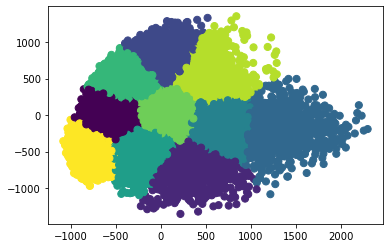

In [64]:
X_proj = steps.named_steps['pca'].transform(X_test)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=predict, s=50, cmap='viridis')

## Expectation Maximization - Gaussian Mixture

We basically apply the same steps that we did for the K-Means model and compare the results

In [54]:
steps = Pipeline( [('pca', PCA(n_components=87)) , ('GMM', GaussianMixture(n_components=10, random_state=42))] )
predictor_gm = steps.fit(X_train)

In [55]:
predict_gm = predictor_gm.predict(X_test)

stats_gm = getClustersStats(predict_gm, y_test)

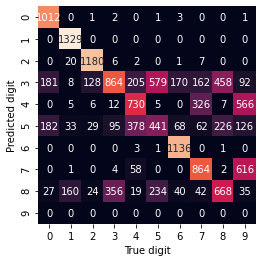

In [95]:
plotConfusionMatrix(predict_gm, y_test)

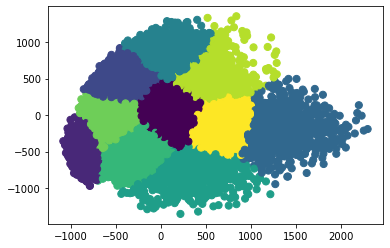

In [91]:
steps = Pipeline( [('pca', PCA(n_components=2)) , ('GMM', GaussianMixture(n_components=10, random_state=42))] )
predictor_gm_2 = steps.fit(X_train)
predict_gm_2 = predictor_gm_2.predict(X_test)

plt.scatter(X_proj[:, 0], X_proj[:, 1], c=predict_gm_2, s=50, cmap='viridis')

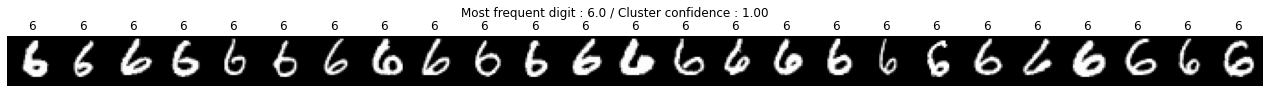

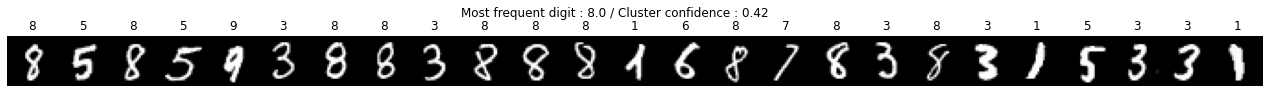

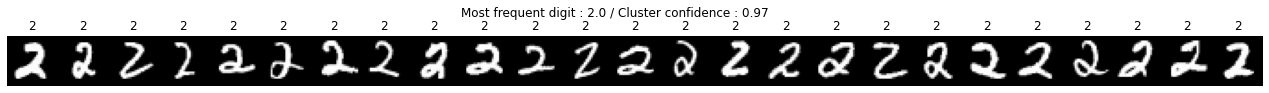

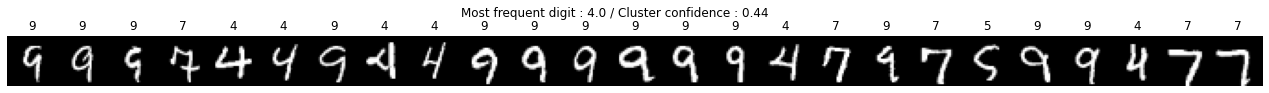

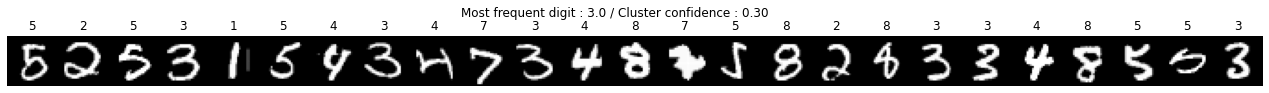

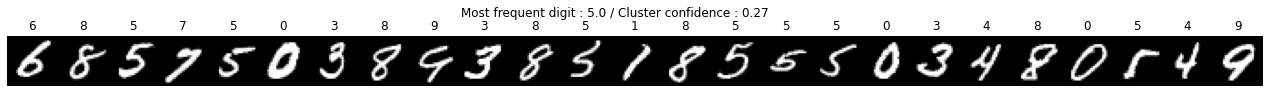

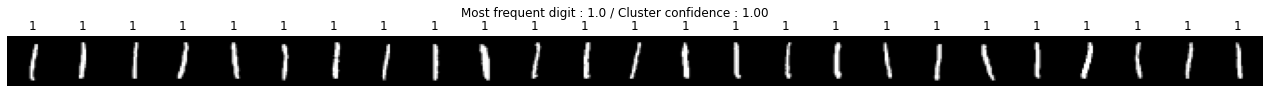

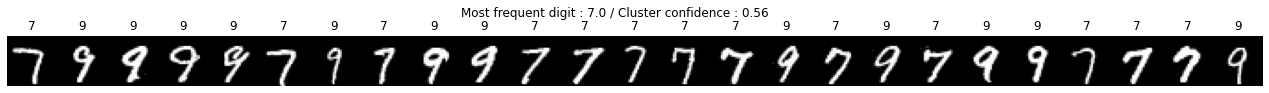

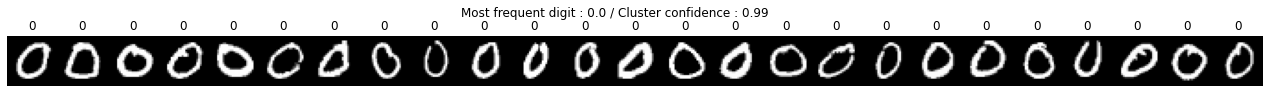

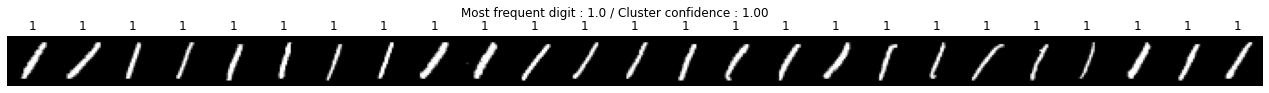

In [56]:
plotClusters(X_test, predict_gm, y_test, stats_gm)

In [57]:
print(f"Overall Confidence for GMM : {stats_gm.sum(0)[1]/10:.2f}")

Overall Confidence for GMM : 0.69
